In [37]:
from sklearn.experimental import enable_iterative_imputer
import numpy as np
from sklearn.impute import IterativeImputer, KNNImputer

def remove_outliers_iqr(data, threshold=1.5):
   
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)

   
    iqr = q3 - q1

   
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr

   
    outliers = (data < lower_bound) | (data > upper_bound)
    cleaned_data = data[~outliers]

    return cleaned_data

import pandas as pd

train = pd.read_csv("C:\\Users\\DELL\\Downloads\\train.csv")

print(train.shape)
print(train.isnull().sum())




train.drop_duplicates(inplace=True)

import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import OneHotEncoder



y_train = train['Survived']
train = train.drop(['PassengerId', 'Name', 'Cabin', 'Survived', 'Parch', "Ticket"], axis=1)



print(train.shape)
for i in train.columns:
    if train[i].dtype == 'object':
        print("")
        print(i, "**********8888888")
        pass
    else:
        print(i, "**********8")
        print(train[i].describe())
        train[i] = remove_outliers_iqr(train[i])
        print(train[i].describe())

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd


numerical_features = ['Age', 'Fare']
categorical_features = ['Embarked', 'Sex']


numerical_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5)),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])

param_grid = {
    'preprocessor__num__imputer__n_neighbors': [3, 5, 10],
    'preprocessor__cat__imputer__strategy': ['most_frequent', 'constant'],
    'classifier__max_depth': [None, 5, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(clf, param_grid, cv=10, scoring='accuracy')
grid_search.fit(train, y_train)

print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)


(891, 12)
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
(891, 6)
Pclass **********8
count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64
count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64

Sex **********8888888
Age **********8
count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64
count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.00000

In [38]:
ypred=grid_search.predict(train)

In [40]:
y_test=y_train
x_test=train

In [41]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,ypred)

array([[485,  64],
       [ 76, 266]], dtype=int64)

In [18]:
pd.crosstab(y_test,ypred, rownames=['True'], colnames=['Predicted'], margins=True)


Predicted,0,1,All
True,,,
0,484,65,549
1,78,264,342
All,562,329,891


In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred))
y_pred_proba = grid_search.predict_proba(train)[:,1]

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       549
           1       0.80      0.77      0.79       342

    accuracy                           0.84       891
   macro avg       0.83      0.83      0.83       891
weighted avg       0.84      0.84      0.84       891



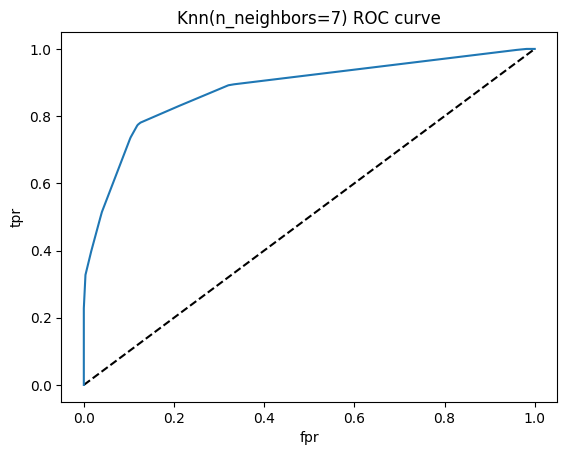

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, y_pred_proba)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=7) ROC curve')
plt.show()

In [21]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.8802048381427157

In [22]:
grid_search.best_params_

{'classifier__max_depth': 5,
 'classifier__min_samples_leaf': 1,
 'classifier__min_samples_split': 5,
 'preprocessor__cat__imputer__strategy': 'most_frequent',
 'preprocessor__num__imputer__strategy': 'median'}

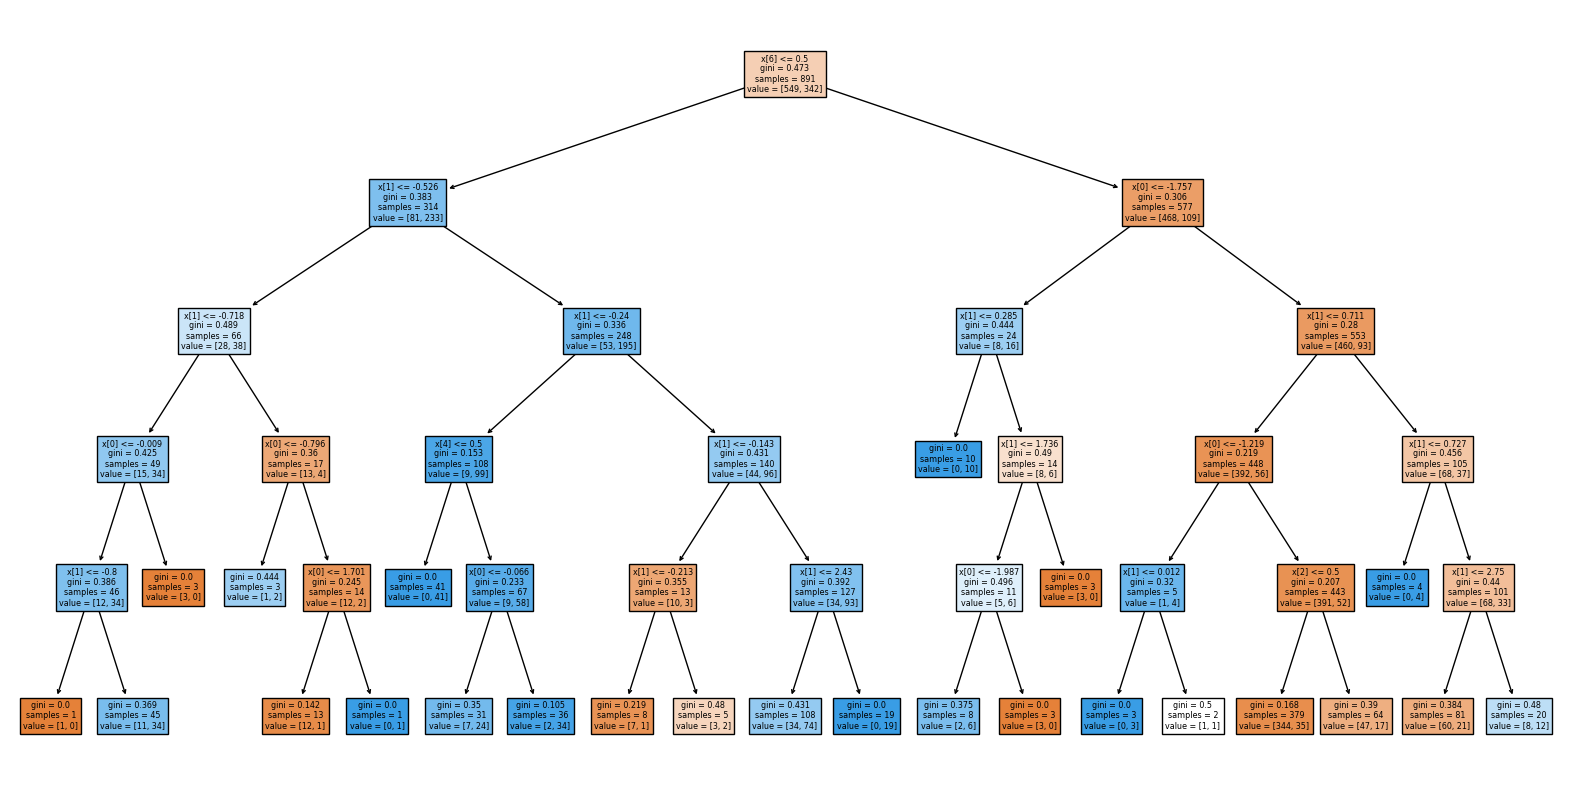

In [23]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plot_tree(grid_search.best_estimator_['classifier'], filled=True, feature_names=None)

plt.show()
